<a href="https://colab.research.google.com/github/Aya11ali/California-Housing-Prices-Regression-Project/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("/content/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y= data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
train_data = x_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

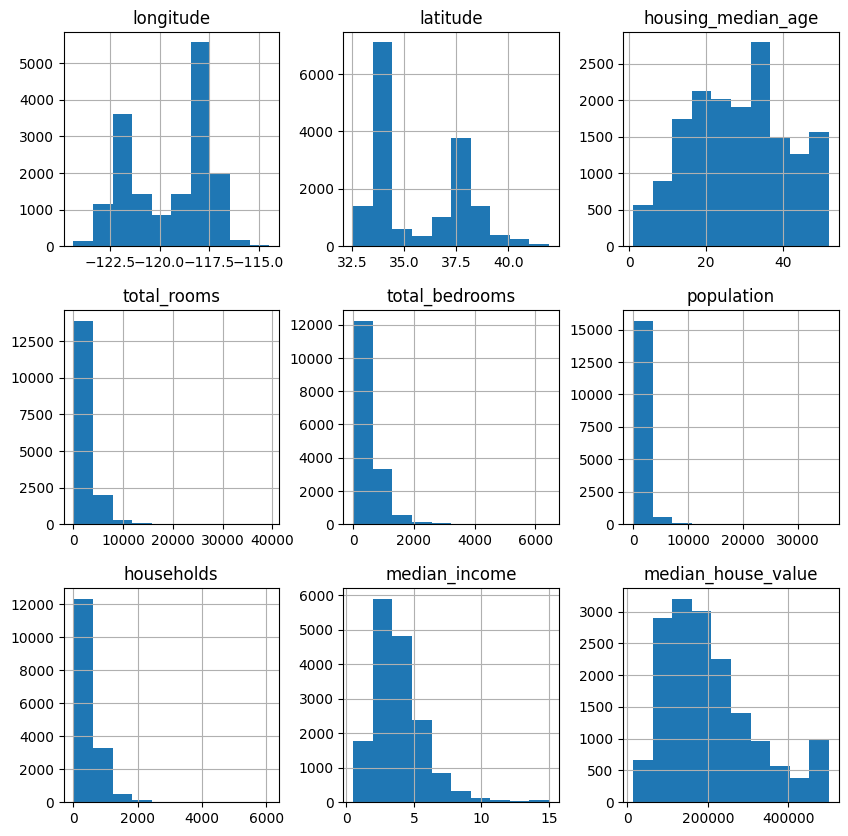

In [14]:
train_data.hist(figsize=(10,10))

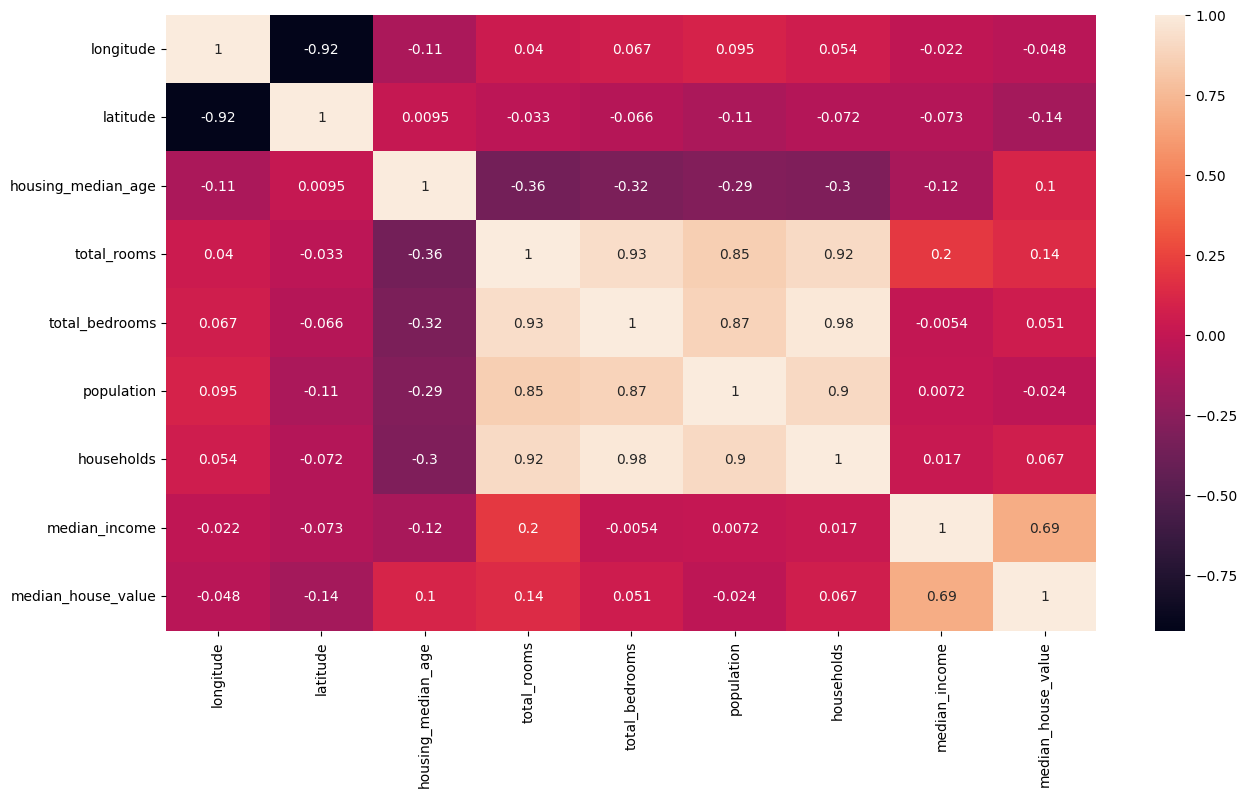

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True)
plt.show()


In [16]:
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

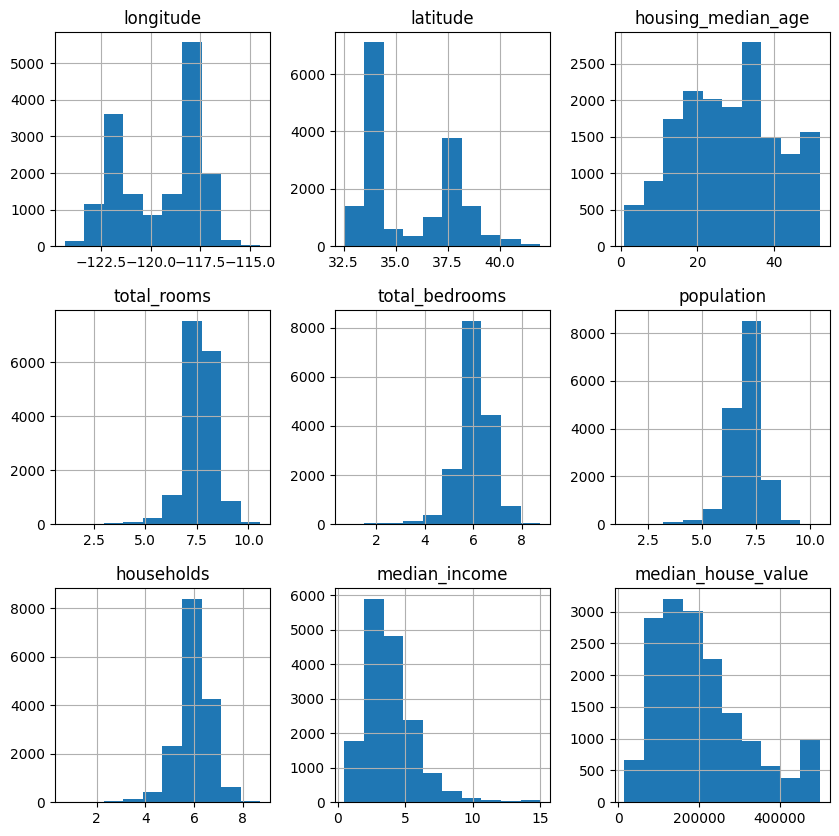

In [17]:
train_data.hist(figsize=(10,10))

In [18]:
train_data = train_data.join(
    pd.get_dummies(train_data.ocean_proximity).astype(int)
).drop(['ocean_proximity'], axis=1)


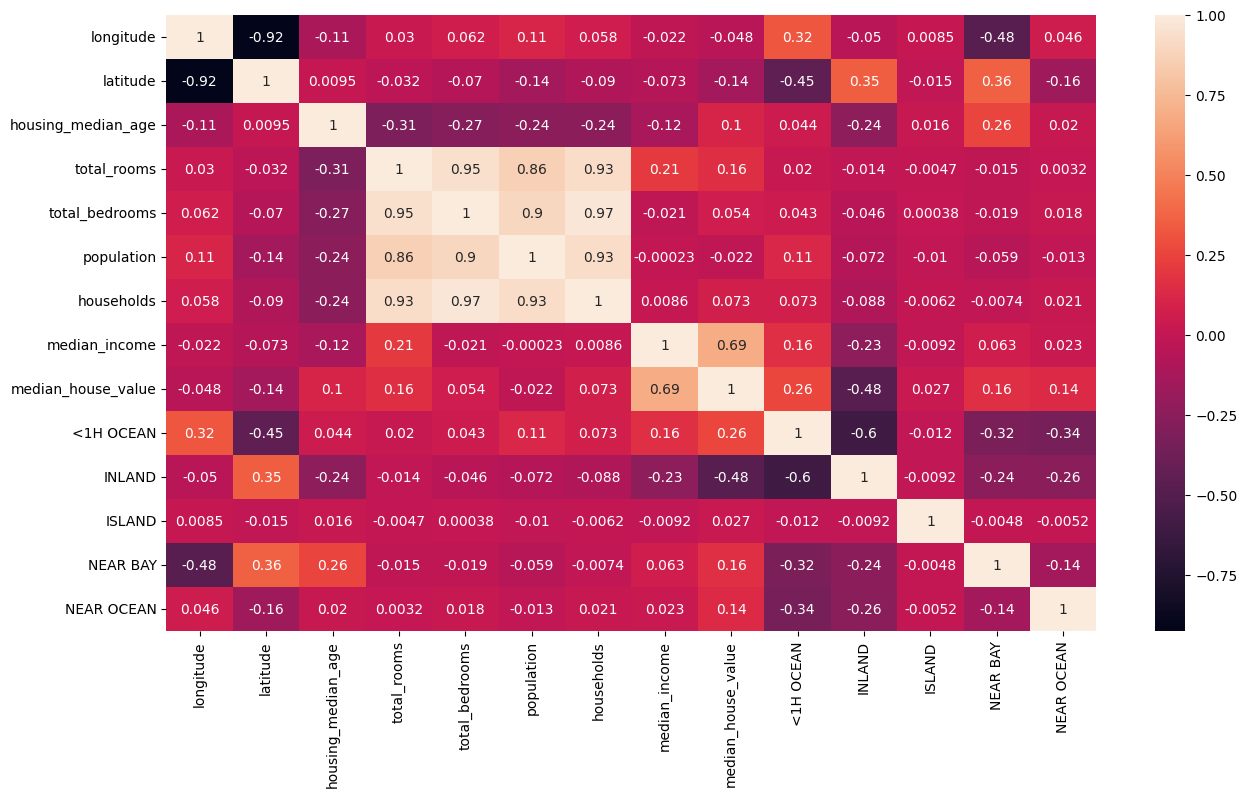

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True)
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

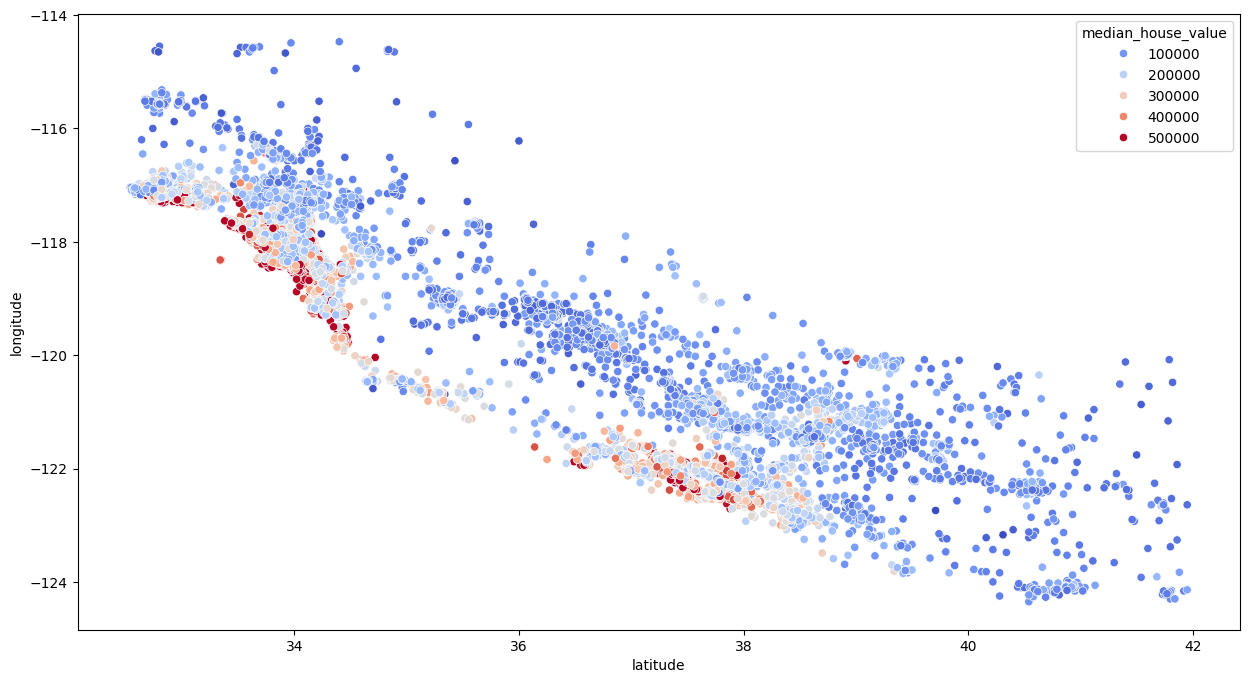

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y = 'longitude', data=train_data, hue = 'median_house_value', palette = 'coolwarm')

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

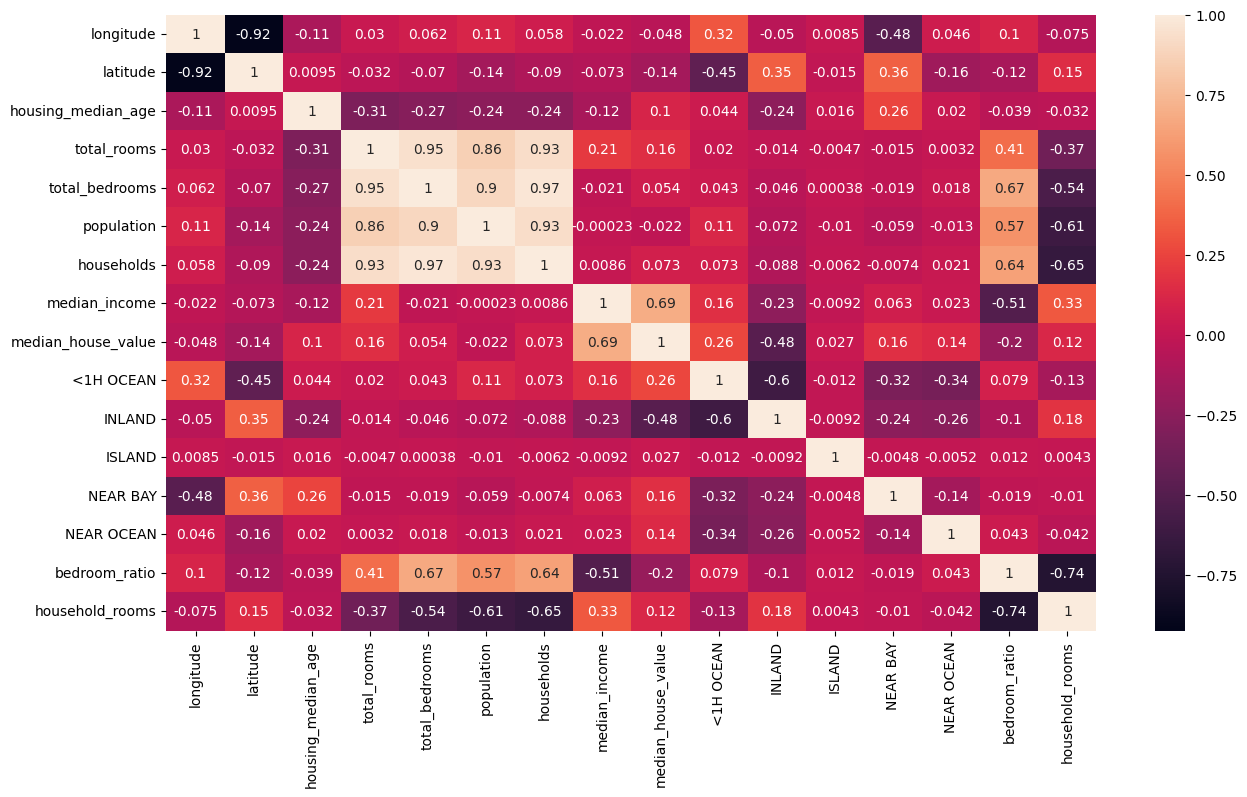

In [22]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True)
plt.show()

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s= scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [24]:
test_data = x_test.join(y_test)

test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(
    pd.get_dummies(test_data.ocean_proximity).astype(int)
).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']

test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [25]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

x_test_s = scaler.transform(x_test)

In [26]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,0,0,0,0,1,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,0,1,0,0,0,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,1,0,0,0,0,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,0,0,0,1,0,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,0,1,0,0,0,0.832130,1.252273


In [27]:
reg.score(x_test_s, y_test)

0.6687407117584969

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train_s, y_train)

RandomForestRegressor()

In [29]:
rf.score(x_test_s, y_test)

0.8200009932592975

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8, 10]
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train_s, y_train)

In [ ]:
best_forest = grid_search.best_params_

In [ ]:
best_forest.score(x_test_s, y_test)